## Aditya Jindal
## Batch M6
## Assignment 6A
## _Fixing the given network_

In [1]:
# Importing all the required libraries from the modules

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import *
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# Loading a database and getting unique number of classes
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

print(num_classes)
print(train_features.shape)
print(test_features.shape)

170500096/170498071 [==============================] - 6s 0us/step
10
(50000, 32, 32, 3)
(10000, 32, 32, 3)


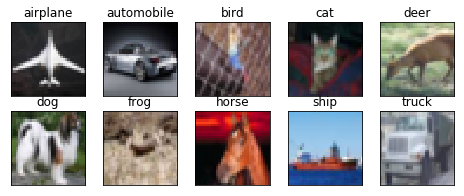

In [3]:
# Printing mentioned classes samples
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Defining function to plot loss and accuracy for model
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Function to get accuracy on our test data
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Set/Convert all the pixel values to float data type 
# Normalizing all pixel values by dividing with 255 so that every value lies btw 0-1

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# Converted the above 1-dimensional class label arrays to num_classes-dimensional class matrices
# As the test and train labels are not splitted into num_classes distinct labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Conv2D(48,(3, 3), padding='same', input_shape=(32, 32, 3)))
# Input = (32x32x3)
# RF = 3
model.add(Activation('relu'))
model.add(Conv2D(48,(3, 3)))
# Input = (32x32x48)
# RF = 5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Input = (30x30x48)
# RF = 10
model.add(Dropout(0.25))
model.add(Conv2D(96,(3, 3), padding='same'))
# Input = (15x15x48)
# RF = 12
model.add(Activation('relu'))
model.add(Conv2D(96,(3, 3)))
# Input = (15x15x96)
# RF = 14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Input = (13x13x96)
# RF = 28
model.add(Dropout(0.25))
model.add(Conv2D(192,(3, 3), padding='same'))
# Input = (6x6x96)
# RF = 30
model.add(Activation('relu'))
model.add(Conv2D(192,(3, 3)))
# Input = (6x6x192)
# RF = 32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Input = (4x4x192)
# RF = 34
model.add(Dropout(0.25))
model.add(Flatten())
# Input = (2x2x192)
# RF = 68
model.add(Dense(512))
# Input = (,768)
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
# Input = (,512)
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Input = (256)
# Output = (,10)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)        41568     
__________

Epoch 1/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1170 - acc: 0.6038 - val_loss: 0.9948 - val_acc: 0.6508
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9655 - acc: 0.6646 - val_loss: 0.9276 - val_acc: 0.6828
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8730 - acc: 0.6993 - val_loss: 0.8077 - val_acc: 0.7181
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7913 - acc: 0.7299 - val_loss: 0.7016 - val_acc: 0.7634
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7351 - acc: 0.7497 - val_loss: 0.7127 - val_acc: 0.7570
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.6941 - acc: 0.7634 - val_loss: 0.6653 - val_acc: 0.7762
Epoch 7/100
390/390 [==============================] - 9s 24ms/step - loss: 0.6524 - acc: 0.7771 - val_loss: 0.6269 - val_acc: 0.7876
Epoch 8/100
390/390 [==============================] - 9s 24ms

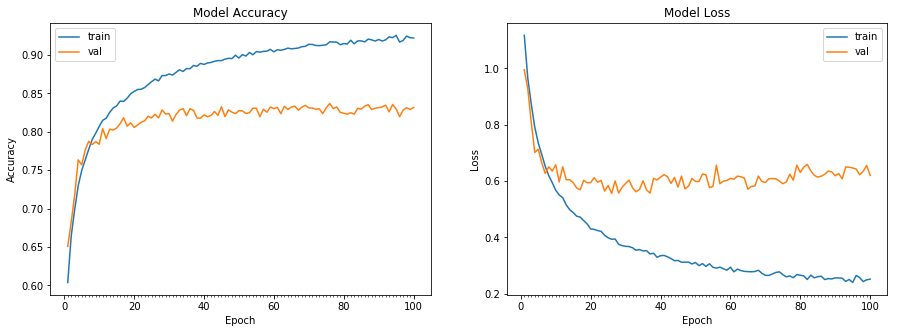

Accuracy on test data is: 83.15


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

# Train the model
start = time.time()

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = train_features.shape[0]//128, epochs = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Test Accuracy
### Achieved 83.15 at the 100th epoch
### Max achieved 83.67 at 76th epoch
#### Taking these test accuracy values as our base for our improved model

## Now we'll improve the model by removing deprecations and tune our model.

In [8]:
# Defining a model using Functional API of Keras
# Import library for functional API

from keras.models import Model
from keras.layers import Input
from keras.regularizers import l2

# Declaring regulariser value
kernel_l2 = 1e-5

input = Input(shape=(32,32,3))

ConvL1 = Conv2D(32,(3, 3), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(input)
# Input for Layer 1 = (32x32x3)
# RF = 3
BNL1 = BatchNormalization()(ConvL1)
DL1 = Dropout(0.1)(BNL1)

ConvL2 = Conv2D(64,(3, 3), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(DL1)
# Input for Layer 2 = (32x32x32)
# RF = 5
BNL2 = BatchNormalization()(ConvL2)
DL2 = Dropout(0.1)(BNL2)

ConvPoint1 = Conv2D(32,(1, 1), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(DL2)
# Input for BottleNeck Layer 1 = (32x32x64)
# RF = 5

MPL1 = MaxPooling2D(pool_size=(2, 2))(ConvPoint1)
# Input for BottleNeck Layer 1 = (32x32x32)
# RF = 10

ConvL3 = Conv2D(64,(3, 3), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(MPL1)
# Input for Layer 3 = (16x16x32)
# RF = 12
BNL3 = BatchNormalization()(ConvL3)
DL3 = Dropout(0.1)(BNL3)

ConvL4 = Conv2D(128,(3, 3), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(DL3)
# Input for Layer 4 = (16x16x64)
# RF = 14
BNL4 = BatchNormalization()(ConvL4)
DL4 = Dropout(0.1)(BNL4)
 
ConvPoint2 = Conv2D(32,(1, 1), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(DL4)
# Input for BottleNeck Layer 2 = (16x16x128)
# RF = 14

MPL2 = MaxPooling2D(pool_size=(2, 2))(ConvPoint2)
# Input for BottleNeck Layer 2 = (16x16x32)
# RF = 28

ConvL5 = Conv2D(32,(3, 3), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(MPL2)
BNL5 = BatchNormalization()(ConvL5)
DL5 = Dropout(0.1)(BNL5)
# Input for Layer 5 = (8x8x32)
# RF = 30

ConvL6 = Conv2D(64,(3, 3), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(DL5)
BNL6 = BatchNormalization()(ConvL6)
DL6 = Dropout(0.1)(BNL6)
# Input for Layer 6 = (8x8x32)
# RF = 32

ConvPoint3 = Conv2D(16,(1, 1), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(DL6)
# Input for BottleNeck Layer 3 = (8x8x64)
# RF = 32

MPL3 = MaxPooling2D(pool_size=(2, 2))(ConvPoint3)
# Input for BottleNeck Layer 3 = (8x8x16)
# RF = 64
 
ConvL7 = Conv2D(32,(3, 3), activation='relu', kernel_regularizer=l2(kernel_l2), padding='same')(MPL3)
BNL7 = BatchNormalization()(ConvL7)
DL7 = Dropout(0.1)(BNL7)
# Input for Layer 7 = (4x4x16)
# RF = 66

ConvOut = Conv2D(num_classes,(4, 4), kernel_regularizer=l2(kernel_l2))(DL7)
# Input for Layer 8 = (4x4x32)
# RF = 69

F_layer = Flatten()(ConvOut)
# Input for Out Layer = (1x1x10)

output = Activation('softmax')(F_layer)
# Input for Out Layer = (,10)

#Initialising the Model
model_tuned = Model(inputs=[input], outputs=[output])
model_tuned.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 64)        0         
__________

In [0]:
# Compile the model
model_tuned.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Changing Learning rate based on monitored quantity
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=3, verbose=1, 
             mode='max', min_delta=0.0001, min_lr=0.00001)


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
390/390 [==============================] - 20s 52ms/step - loss: 1.5855 - acc: 0.4310 - val_loss: 1.9199 - val_acc: 0.3878
Epoch 2/30
390/390 [==============================] - 16s 40ms/step - loss: 1.1240 - acc: 0.6015 - val_loss: 1.7705 - val_acc: 0.4773
Epoch 3/30
390/390 [==============================] - 15s 39ms/step - loss: 0.9776 - acc: 0.6590 - val_loss: 1.0296 - val_acc: 0.6481
Epoch 4/30
390/390 [==============================] - 15s 39ms/step - loss: 0.8821 - acc: 0.7000 - val_loss: 1.0423 - val_acc: 0.6557
Epoch 5/30
390/390 [==============================] - 15s 39ms/step - loss: 0.8278 - acc: 0.7243 - val_loss: 0.9668 - val_acc: 0.6848
Epoch 6/30
390/390 [==============================] - 15s 39ms/step - loss: 0.7856 - acc: 0.7417 - val_loss: 1.1715 - val_acc: 0.6245
Epoch 7/30
390/390 [==============================] - 15s 39ms/step - loss: 0.7658 - acc: 0.7536 - val_loss: 0.9421 - val_acc: 0.7085
Epoch 8/30
390

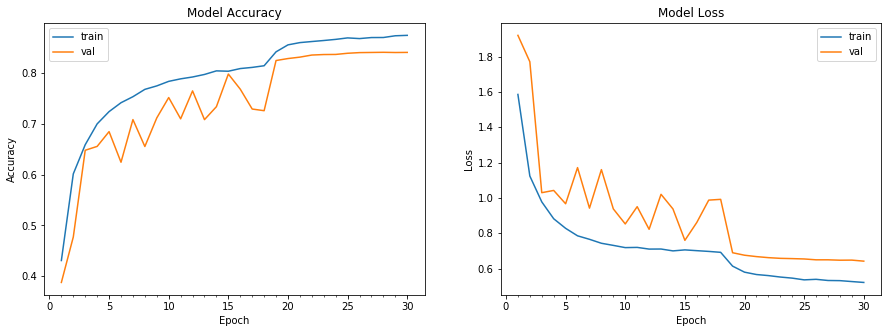

Accuracy on test data is: 84.08 


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

# Train the model
start = time.time()
model_info_tuned = model_tuned.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = train_features.shape[0]//128, epochs = 30, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = [reduce_lr])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info_tuned)
# compute test accuracy
print ("Accuracy on test data is: %0.2f "%accuracy(test_features, test_labels, model_tuned))

## Test Accuracy after tuning
### Removed Overfitting 
### Achieved 84.08 at the 30th epoch
### Max achieved 84.10 at 28th epoch

